# D2 - 03 - Mini Projects (solution)

## Content
- Linear problems
- Monte Carlo sampling

## Remember jupyter notebooks
- To run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>.
- To get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Linear problems
We want to solve
$$\mathbf{A}\mathbf{x}=\mathbf{b}$$
where $\mathbf{A}\in\mathbb{R}^{N \times N}$ and $\mathbf{x},\mathbf{b}\in\mathbb{R}^N$ using `numpy`.

**Task**: create a matrix `A` and a matching vector `x` randomly, and compute the RHS `b` using the `np.dot(A, x)` function. Then, use `np.linalg.solve()` on `A` and `b` to recover `x_rec`. Use `np.linalg.norm()` to compute the distance between `x` and `x_rec`.

**Hint**: look up the docstrings (<kbd>&#x21E7;</kbd>+<kbd>&#x21E5;</kbd> with cursor inside function brackets) to learn more about the functions you dont know.

In [2]:
N = 5

A = np.random.randint(1, 11, (N, N))
x = np.random.randn(N)
b = np.dot(A, x)
print(A)
print(b)

x_rec = np.linalg.solve(A, b)
print(x_rec)
print(np.linalg.norm(x - x_rec))

[[ 8  4  4  7  6]
 [ 2 10  8  7  8]
 [ 3  1  6  4  6]
 [ 9  7  4  8  8]
 [ 7  4  2  7  9]]
[ 0.61632628  3.47244184  6.65373023 -0.56785925 -0.57567356]
[ 0.07167323 -0.44223703  1.25371154 -0.85387865  0.46236549]
1.3371736463e-15


## Monte Carlo sampling
We can use a random sampling strategy to estimate the value of $\pi$.

Draw $N$ random tuples $(x,y)$ uniformly distributed inside the unit square $[0, 1]^2$. For each tuple compute the distance from $(0,0)$. Count the number tuples whose distance is smaller than $1$ ($N_\textrm{hit}$) and divide this number by the total amount of tuples ($N$). You can approximate
$$\pi \approx \frac{4 N_\textrm{hit}}{N}$$

How does the MC-sampled estimate converge with $N$?

In [3]:
def pi(throws):
    rnd = np.random.rand(throws, 2)
    dst = np.linalg.norm(rnd, axis=1)
    hits = np.where(dst < 1)[0].size
    return 4 * hits / throws

def pi_sample(throws, size):
    return [pi(throws) for _ in range(size)]

throws = [10**k for k in range(2, 7)]
data = np.asarray([pi_sample(n, 100) for n in throws])

[]

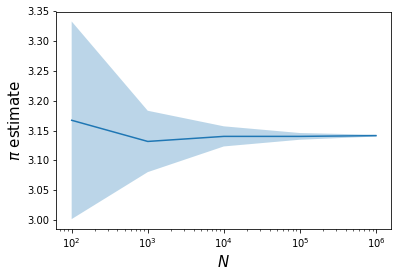

In [4]:
mean = np.mean(data, axis=1)
std = np.std(data, axis=1)

plt.plot(throws, mean)
plt.fill_between(throws, mean - std, mean + std, alpha=0.3)
plt.xlabel('$N$', fontsize=15)
plt.ylabel('$\pi$ estimate', fontsize=15)
plt.semilogx()

[]

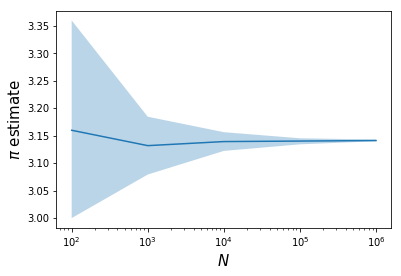

In [5]:
median = np.median(data, axis=1)
p16 = np.percentile(data, 16, axis=1)
p84 = np.percentile(data, 84, axis=1)

plt.plot(throws, median)
plt.fill_between(throws, p16, p84, alpha=0.3)
plt.xlabel('$N$', fontsize=15)
plt.ylabel('$\pi$ estimate', fontsize=15)
plt.semilogx()

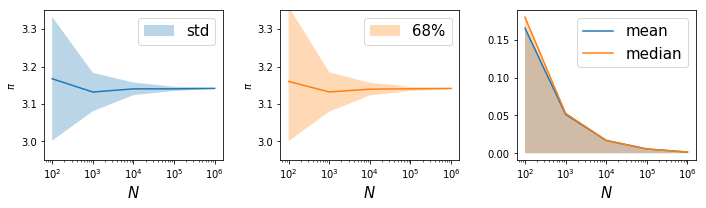

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharex=True)

axes[0].plot(throws, mean, color='C0')
axes[0].fill_between(throws, mean - std, mean + std, alpha=0.3, facecolor='C0', label='std')

axes[1].plot(throws, median, color='C1')
axes[1].fill_between(throws, p16, p84, alpha=0.3, facecolor='C1', label='68%')

width = (p84 - p16) / 2
axes[2].plot(throws, std, color='C0', label='mean')
axes[2].plot(throws, width, color='C1', label='median')
axes[2].fill_between(throws, 0, std, alpha=0.3, facecolor='C0')
axes[2].fill_between(throws, 0, width, alpha=0.3, facecolor='C1')

for ax in axes.flat:
    ax.semilogx()
    ax.set_xlabel('$N$', fontsize=15)
    ax.legend(fontsize=15)

for ax in axes[:-1]:
    ax.set_ylabel('$\pi$')
    ax.set_ylim(2.95, 3.35)

fig.tight_layout()